In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import matplotlib.pyplot as plt

EL objetivo de este programa es modelar con regresión lineal el precio del servicio médico con las variables de edad, sexo, hijos, etc. En otras palabras buscamos los coeficientes a_{n} tal que y=a_{1}x_{1} + .....+ a_{n}x_{n}.

In [43]:
datos = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [44]:
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Es conveniente observar unas graficas de nuestros datos

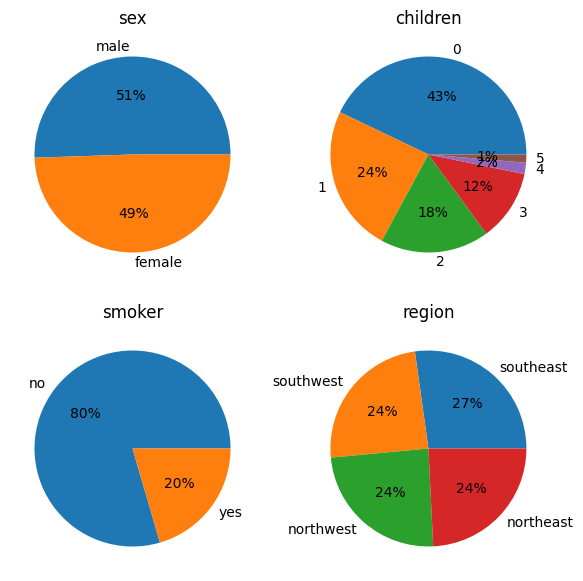

In [45]:
a = 0
cat = []
con = []
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
for i in datos.columns:
    if datos[i].nunique() < 10:
        p = a // 2
        q = a % 2
        df1 = datos[i].value_counts()
        ax[p,q].pie(df1, labels = df1.index, autopct='%.0f%%')
        ax[p,q].set_title(i)
        a = a+1
        cat.append(i)
    else:
        con.append(i)
plt.show()

Nos enfocamos en categorizar las variables que no contienen números

In [46]:
dummy_sex = pd.get_dummies(datos["sex"], prefix = "sex")
dummy_Zona = pd.get_dummies(datos["region"], prefix = "region")
dummy_smoker = pd.get_dummies(datos["smoker"], prefix = "smoker")

In [47]:
column_names = datos.columns.values.tolist()
column_names

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [48]:
datos_2 = datos[column_names].join(dummy_sex)
column_names2 = datos_2.columns.values.tolist()

In [49]:
datos_2= datos_2[column_names2].join(dummy_Zona)
column_names2 = datos_2.columns.values.tolist()

In [50]:
datos_2= datos_2[column_names2].join(dummy_smoker)

In [51]:
datos_2.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0,1,0


In [52]:
columnas=["age", "bmi" ,"children","sex_female" ,"sex_male"  ,"region_northeast", "region_northwest", "region_southeast", "region_southwest","smoker_no", "smoker_yes" ]

In [53]:
X=datos_2[columnas]
Y=datos_2["charges"]

Procedemos a ver cuales son las variables que nos conviene tener en la regresión

In [54]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X,Y)

In [55]:
selector.ranking_

array([1, 7, 1, 3, 1, 2, 6, 5, 4, 1, 1])

In [56]:
x_predic = datos_2[["age" ,"children" ,"sex_male","smoker_no", "smoker_yes"]]

Grafiquemos los gastos vs cada una de las variables que nos dice el ranking para poder observar la dependencia.

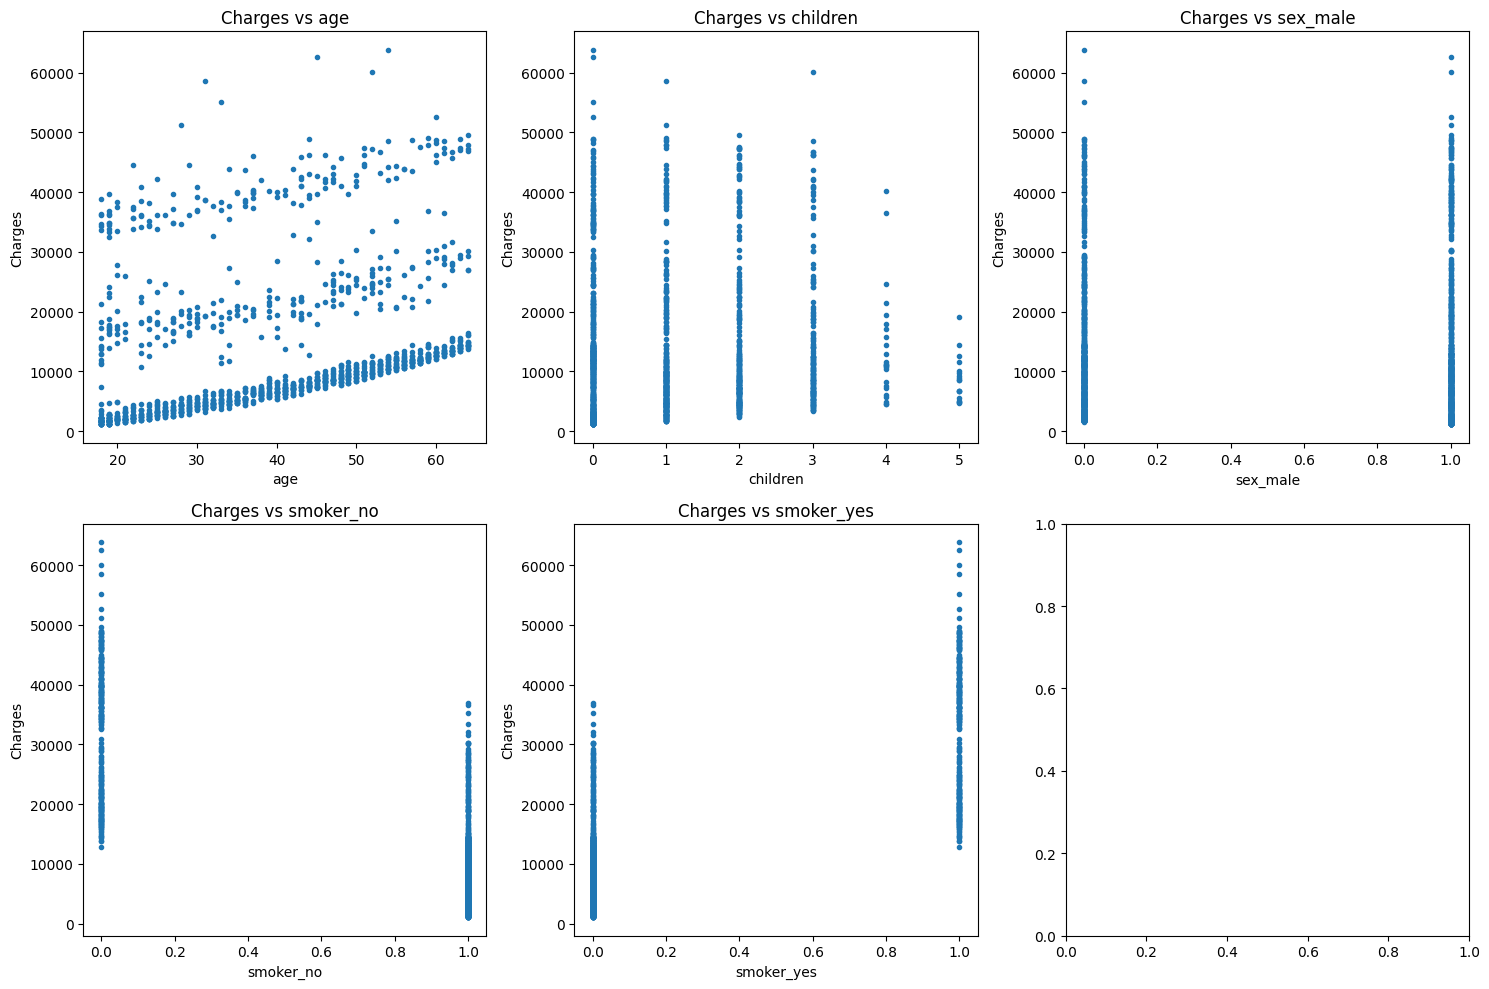

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, ax in zip(x_predic, axes.flatten()):
    ax.plot(datos_2[i], datos_2["charges"], "o", markersize=3)
    ax.set_xlabel(i)
    ax.set_ylabel("Charges")
    ax.set_title("Charges vs " + i)

plt.tight_layout()
plt.show()

In [58]:
lm = LinearRegression()
lm.fit(x_predic, Y)

LinearRegression()

In [59]:
lm.coef_, lm.intercept_

(array([   273.13177854,    486.20915563,     61.32237177, -11918.43073722,
         11918.43073722]),
 9035.43719460973)

In [60]:
lm.score(x_predic, Y)

0.7237495964252298

In [61]:
y_predic=(lm.predict(x_predic))

In [62]:
np.mean((np.abs(y_predic - datos_2["charges"]) / datos_2["charges"] )  *100)

32.06055844982911


podemos ver que el promedio de los errores porcentuales es de 32.06%, lo cual nos indica que es una aproximación deficiente y eso ya lo veiamos desde lm.score con un valor de 0.7237, lo cual nos sugiere que lo podemos modelar de otra forma, sin embargo sigue teniendo un gran peso la aproximación.